In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from datetime import datetime
current_datetime = datetime.now()
current_year = current_datetime.year

In [3]:
df = pd.read_csv('car_prediction_dataset.csv')

In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [5]:
df.shape[0]

8128

In [6]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats'],
      dtype='object')

In [7]:
df['name'].value_counts()

name
Maruti Swift Dzire VDI                     129
Maruti Alto 800 LXI                         82
Maruti Alto LXi                             71
BMW X4 M Sport X xDrive20d                  62
Maruti Swift VDI                            61
                                          ... 
Volkswagen Polo Select 1.2 MPI Highline      1
Ford Ecosport 1.5 Petrol Titanium            1
Honda Accord 2.4 A/T                         1
Audi A3 40 TFSI Premium                      1
Maruti SX4 ZXI MT BSIV                       1
Name: count, Length: 2058, dtype: int64

In [8]:
df.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

In [9]:
# df.dropna(inplace=True)
df.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

In [10]:
df.fillna(value=5.0, inplace=True)
df['mileage(km/ltr/kg)'].shape[0]

8128

In [11]:
dups = int(df.duplicated().sum())
print(f"There are {dups} duplicates in your data.")

There are 1202 duplicates in your data.


In [12]:
df[df['selling_price'] > 0.8e7]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
170,Volvo XC90 T8 Excellence BSIV,2017,10000000,30000,Petrol,Individual,Automatic,First Owner,42.0,1969.0,400,4.0


### plotting selling price vs year of all the cars

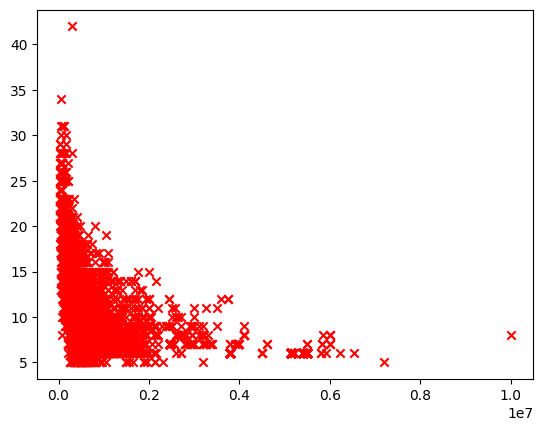

In [13]:
x = df['selling_price']
df['y'] = current_year - df['year']

plt.scatter(x,df['y'], marker='x', c='r')
# sns.scatterplot(x='selling_price',y='year', data=df, marker='x')
plt.show()

###### df[df['y'] > 40]

In [14]:
df.drop('y', axis=1, inplace=True)

In [15]:
# I want to buy a car which follows certain conditions:
# 1) The car is under the budget (<400000).
# 2) The car should be limited to a maximum of two owners.
# 3) Car has a minimum life of n years.


In [16]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0


In [17]:
shape1 = df.shape[0]

### REMOVING DUPLICATES

In [18]:
df.drop_duplicates(inplace=True)
# shape2 = df.shape[0]
print(f"There were {dups} duplicates in your data which have been successfully removed.")

There were 1202 duplicates in your data which have been successfully removed.


### Taking user input

In [19]:
#user input

min_budget = int(input("Enter the min budget: "))
max_budget = int(input("Enter the max budget: "))

life = int(input("Enter the minimum life span required for the car: "))
fuel_type = input("Enter the fuel type, Diesel, Petrol or CNG: ")
# owner_list = ['First Owner','Second Owner','Third Owner']
# fuel_list = ['Diesel', 'Petrol', 'CNG']


Enter the min budget:  700000
Enter the max budget:  1200000
Enter the minimum life span required for the car:  7
Enter the fuel type, Diesel, Petrol or CNG:  petrol


### Filtering budget

In [20]:
#budget section

df1 = df[(df['selling_price'] > min_budget) & (df['selling_price'] < max_budget)].copy()

# df1 = df.query('min_budget < selling_price < max_budget').copy()



### Evaluate Age of cars and filtering by life span

In [21]:
##### age of car section

# life_span = current_year - df['year']
# if life_span > life:
#     df = df[df['year'] - life]

life_span = []
for i in range(df1.shape[0]):
    n = current_year - df1.iloc[i, 1]
    life_span.append(int(n))

df1['Age'] = life_span 
df1 = df1[df1['Age'] <= life]


# names = df['name']
# names = list(names)
# car_pair = zip(names, lif)
# print(car_pair)
# file1 = pd.DataFrame(car_pair,columns=['Name', 'Lifespan'])
# print(file1)
# file1.to_csv('carpair.csv', index=False)

### Filtering fuel type

In [ ]:
##### fuel section

# fuels = list(df['fuel'])d

fuel_type = fuel_type.capitalize()
# if fuel_type.capitalize() in fuels:
df1 = df1[df1['fuel'] == fuel_type]



### Displaying the available cars

In [23]:
available = df1.shape[0]
if available == 0:
    print("There are no cars available.")
elif available == 1:
    print(f"There is only 1 car available which is -> {df1.iloc[0,0]}")
else: 
    print(f"There are {available} cars available:\n{df1.iloc[:,0]}")

 

There are 45 cars available:
37                Hyundai Verna VTVT 1.6 SX Option
160                            Toyota Glanza V CVT
196             Hyundai Elite i20 Sportz Plus BSIV
345                 Mahindra XUV300 W8 Option BSIV
386                  Honda Amaze V CVT Petrol BSIV
583                     Maruti Swift Dzire VXI 1.2
790            Ford Freestyle Titanium Petrol BSIV
900           Hyundai Elite i20 Petrol Asta Option
922                               Maruti XL6 Alpha
1017              Hyundai Verna VTVT 1.6 SX Option
1240        Hyundai Elite i20 Sportz Plus CVT BSIV
1570                          Nissan Kicks XV BSIV
1736                   Hyundai i20 Active S Petrol
1768                     Ford Aspire Titanium BSIV
2231             Skoda Rapid 1.6 MPI Ambition BSIV
2298                             Honda Jazz VX CVT
2371                          Nissan Kicks XL BSIV
2443              Tata Nexon 1.2 Revotron XZA Plus
2717                           Maruti Baleno Alpha
29

### calculating price to mileage ratio

In [25]:
df2 = df1.sort_values('engine', ascending=False).head(10).copy()

In [ ]:
print(df2.shape)
df2

### calculating price to mileage ratio

In [34]:
# price to mileage ratio
# df2 = df1.copy()
ratio = df2['selling_price'] / df2['mileage(km/ltr/kg)']

df2['price to mileage ratio'] = ratio.round(2)



df2 = df2.nsmallest(5, 'price to mileage ratio')
df2.reset_index()
# print("The leading cars having the minimum Price:Mileage ratio available within your preferred options are: ")

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,Age,price to mileage ratio
0,2231,Skoda Rapid 1.6 MPI Ambition BSIV,2019,725000,25000,Petrol,Individual,Manual,First Owner,15.41,1598.0,103.2,5.0,6,47047.37
1,4767,Maruti Ciaz Delta Automatic BSIV,2019,1025000,15000,Petrol,Dealer,Automatic,First Owner,20.28,1462.0,103.25,5.0,6,50542.41
2,6512,Ford EcoSport 1.5 Petrol Titanium BSIV,2019,885000,10000,Petrol,Individual,Manual,Second Owner,17.00,1497.0,121.31,5.0,6,52058.82
3,2964,Skoda Rapid 1.6 MPI AT Ambition BSIV,2019,835000,10000,Petrol,Individual,Automatic,First Owner,14.84,1598.0,103.2,5.0,6,56266.85
4,6480,Hyundai Verna VTVT 1.6 SX,2019,990000,15000,Petrol,Individual,Manual,First Owner,17.00,1591.0,121.3,5.0,6,58235.29


### plotting selling price vs p-m ratio of the suggested top cars

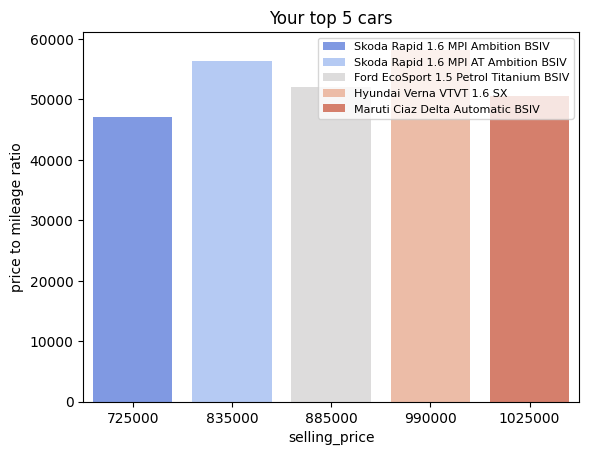

In [35]:
x = df1['selling_price']
y = df1['price to mileage ratio']


sns.barplot(x='selling_price', y='price to mileage ratio', data=df2,hue='name', palette='coolwarm')
plt.title("Your top 5 cars")
plt.legend(fontsize=8)
plt.show()


#### plt.scatter(x,y)
plt.xlabel('Selling Price')
plt.ylabel('Price to Mileage Ratio')
plt.show()

In [29]:
# plt.scatter(x,z)
# plt.show()